# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Original Prompt

Identify the key drivers for used car prices.

#### Technical Prompt

1. What features of the dataset are postively and negatively correlated with the price of a used car?
2. How much weight does a specific feature carry in determining the price of a used car?
3. Given a set of features, could we roughly estimate what the car should cost?

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv("data/vehicles.csv")

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [98]:
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
105059,7315237611,orlando,500,2010.0,chevrolet,colorado,NaN,NaN,gas,10000000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,fl
243022,7307829633,raleigh / durham / CH,11995,2011.0,chevrolet,silverado 1500,NaN,8 cylinders,gas,186450.0,clean,other,1GCRKREA0BZ425899,4wd,NaN,truck,grey,nc
10988,7316435823,phoenix,5995,2013.0,chevrolet,impala,NaN,NaN,gas,124088.0,clean,automatic,2G1WG5E35D1252982,NaN,NaN,sedan,red,az
144921,7310930268,rockford,18995,2017.0,ford,focus,excellent,4 cylinders,gas,51137.0,clean,automatic,1FADP3L91HL313406,fwd,mid-size,sedan,white,il
38004,7311619006,modesto,0,2018.0,subaru,crosstrek,NaN,NaN,gas,43766.0,clean,automatic,JF2GTAJC6JH263635,NaN,NaN,wagon,black,ca


#### Data Observations

1. Quite a few NaN columns 
    - likely unreported statistics
    - need to figure out how to handle those

2. Year Vs Condition Vs Odometer
    - each of these can give us a general idea as to how used a user car is

3. Region and State
    - geography could affect pricing of the car, more expensive areas = expensive prices

4. Car Identification
    - manufacturer, model, VIN
    - potentually useful for clustering

5. Car Features
    - cylinder, fuel, transmission, type, paint_color
    - useful for clustering
    - may hold information for the performance of a car
        - greater performance = higher sale price

In [99]:
len(df)

426880

## Data Observations - Numerical Columns

In [100]:
numeric_cols = df.select_dtypes(include='number')
num = numeric_cols.dropna()

In [101]:
def remove_outliers(df, col_name):
    QT1 = df[col_name].quantile(0.25)
    QT3 = df[col_name].quantile(0.75)
    
    IQR = QT3 - QT1

    low = QT1 - 1.5 * IQR
    high = QT3 + 1.5 * IQR
    
    df = df.loc[(df[col_name] > low) & (df[col_name] < high)]
    return df

In [102]:
num = remove_outliers(num, 'price')
num = remove_outliers(num, 'odometer')

In [103]:
num_temp = num.iloc[0:10000]

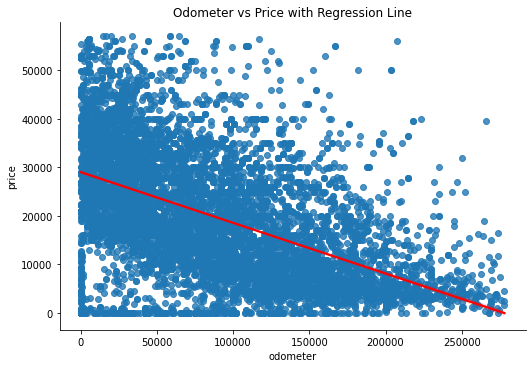

In [104]:
sns.lmplot(data=num_temp, x='odometer', y='price', height=5, aspect=1.5, line_kws={'color': 'red'})
plt.title("Odometer vs Price with Regression Line")
plt.show()

In [105]:
num['decade'] = (num['year'] // 10) * 10

In [106]:
decade_avg = num.groupby('decade')['price'].mean()
decade_avg = decade_avg.reset_index()

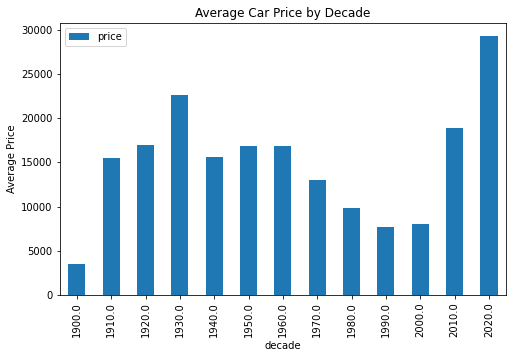

In [107]:
decade_avg.plot(kind='bar', x='decade', y='price', figsize=(8,5))
plt.title("Average Car Price by Decade")
plt.ylabel("Average Price")
plt.show()

## Data Observations - Categorical Columns

In [108]:
df_temp = remove_outliers(df, 'price')

### Category vs Price

In [109]:
man_avg = df_temp.groupby('manufacturer')['price'].mean()
man_avg = man_avg.reset_index()

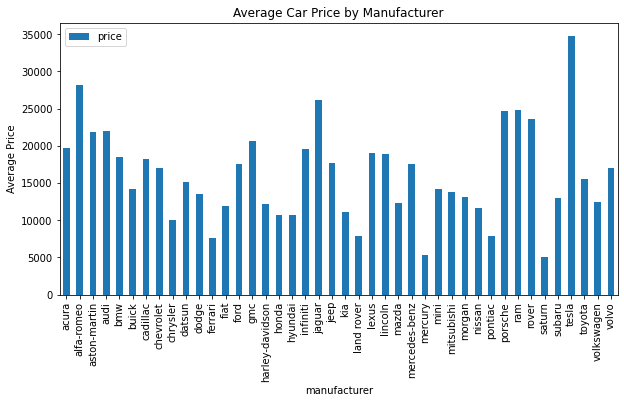

In [110]:
man_avg.plot(kind='bar', x='manufacturer', y='price', figsize=(10,5))
plt.title("Average Car Price by Manufacturer")
plt.ylabel("Average Price")
plt.show()

In [111]:
state_avg = df_temp.groupby('state')['price'].mean()
state_avg = state_avg.reset_index()

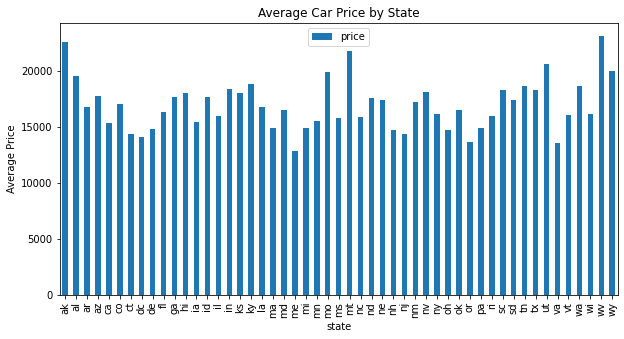

In [112]:
state_avg.plot(kind='bar', x='state', y='price', figsize=(10,5))
plt.title("Average Car Price by State")
plt.ylabel("Average Price")
plt.show()

### Count of Features

In [113]:
count_size = df_temp['size'].value_counts()

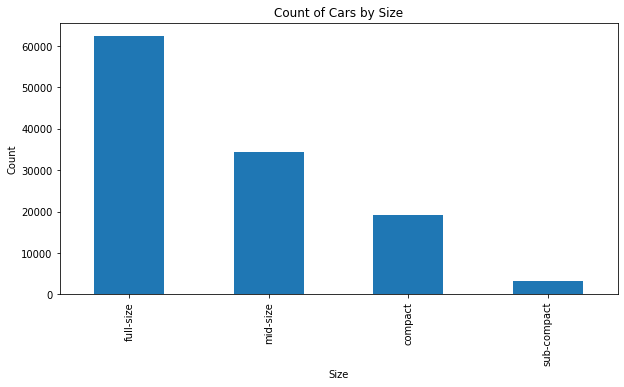

In [114]:
count_size.plot(kind='bar', figsize=(10,5))
plt.title("Count of Cars by Size")
plt.xlabel("Size")
plt.ylabel("Count")
plt.show()

In [115]:
count_fuel = df_temp['fuel'].value_counts()

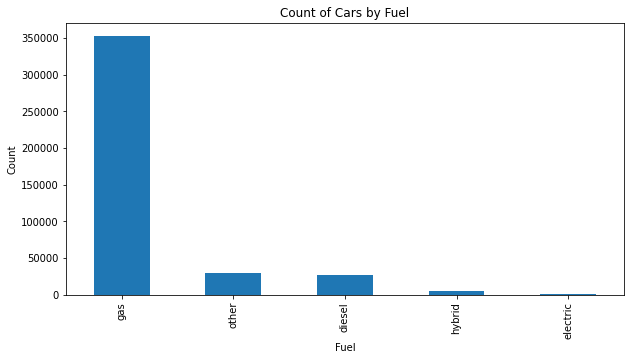

In [116]:
count_fuel.plot(kind='bar', figsize=(10,5))
plt.title("Count of Cars by Fuel")
plt.xlabel("Fuel")
plt.ylabel("Count")
plt.show()

In [117]:
count_transmission = df_temp['transmission'].value_counts()

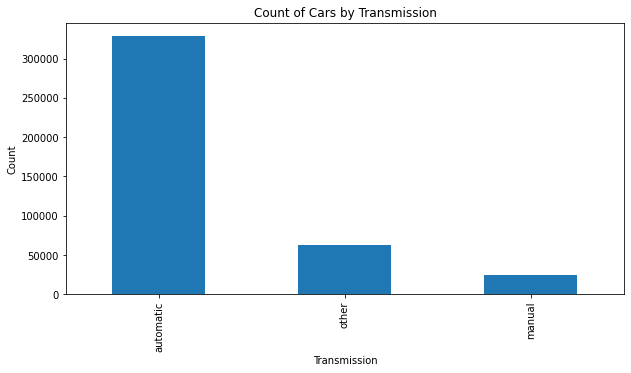

In [118]:
count_transmission.plot(kind='bar', figsize=(10,5))
plt.title("Count of Cars by Transmission")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.show()

In [119]:
count_type = df_temp['type'].value_counts()

In [120]:
type_avg = df_temp.groupby('type')['price'].mean()
type_avg = type_avg.reset_index()

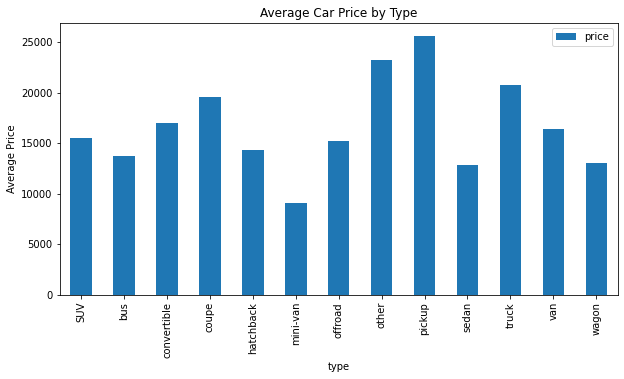

In [121]:
type_avg.plot(kind='bar', x='type', y='price', figsize=(10,5))
plt.title("Average Car Price by Type")
plt.ylabel("Average Price")
plt.show()

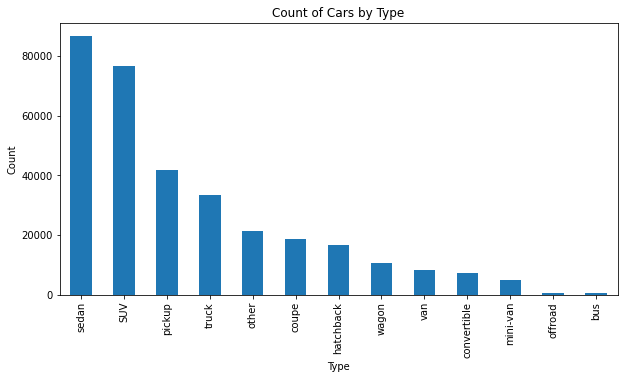

In [122]:
count_type.plot(kind='bar', figsize=(10,5))
plt.title("Count of Cars by Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

## Feature Engineering


#### weight_est and length_est
- a cars weight and length are important numerical features that could allow a model to more accurately gauge the price
- bigger cars or cars with more mass may be more expensive than smaller cars
- I used chat gpt to create a dictionary which maps each type of car to an average weight and length which was then used to create two new numerical features called weight_est and length_est

#### removing outliers
- outliers were prevalent in the numerical data, price and odometer
    - some prices and odometer readings were astromically high
    - others included prices that were 0
- I decided to use values within the interquartile range to identify outliers and improve model performance

#### cylinder count
- converted the cylinders column to integers

#### year normalization
- set the median year to 0 and all years values were relative to that


In [123]:
df = df.dropna(subset=['price', 'odometer', 'year'])

In [124]:
df = df.dropna(subset='type')

In [125]:
df = df[df['type'] != 'other']

In [126]:
## get us average numerical features by type
## dictionary that stores weight and length

vehicle_stats = {
    "sedan":        {"weight_lb": 3000, "length_in": 185},
    "SUV":          {"weight_lb": 4200, "length_in": 195},
    "pickup":       {"weight_lb": 4500, "length_in": 210},
    "truck":        {"weight_lb": 5000, "length_in": 220},
    "coupe":        {"weight_lb": 2900, "length_in": 180},
    "hatchback":    {"weight_lb": 2700, "length_in": 170},
    "wagon":        {"weight_lb": 3300, "length_in": 185},
    "van":          {"weight_lb": 4300, "length_in": 200},
    "convertible":  {"weight_lb": 3100, "length_in": 175},
    "mini-van":     {"weight_lb": 4500, "length_in": 200},
    "offroad":      {"weight_lb": 4800, "length_in": 190},
    "bus":          {"weight_lb": 25000, "length_in": 420}
}

In [127]:
df["weight_est"] = df["type"].map(lambda x: vehicle_stats[x]["weight_lb"])
df["length_est"] = df["type"].map(lambda x: vehicle_stats[x]["length_in"])

In [128]:
df = df.drop(['VIN', 'id', 'region', 'paint_color'], axis=1)

In [129]:
def remove_outliers(df, col_name):
    QT1 = df[col_name].quantile(0.25)
    QT3 = df[col_name].quantile(0.75)
    
    IQR = QT3 - QT1

    low = QT1 - 1.5 * IQR
    high = QT3 + 1.5 * IQR
    
    df = df.loc[(df[col_name] > low) & (df[col_name] < high)]
    return df

In [130]:
df = remove_outliers(df, "odometer")
df = remove_outliers(df, "price")

In [131]:
df = df.dropna(subset='cylinders')

In [132]:
df.loc[:, 'cylinders_count'] = df['cylinders'].str.split().str[0]
df = df.drop('cylinders', axis=1)

df = df.loc[df['cylinders_count'] != 'other']
df.loc[:,'cylinders_count'] = df['cylinders_count'].astype(int)

In [133]:
df['year_centered'] = df['year'] - df['year'].median()
df = df.drop('year', axis=1)

In [134]:
df = df.dropna()

In [135]:
len(df)

79252

In [136]:
df.sample(5)

,price,manufacturer,model,condition,fuel,odometer,title_status,transmission,drive,size,type,state,weight_est,length_est,cylinders_count,year_centered
254484,35000,ford,f350 super duty,excellent,gas,38445.0,clean,automatic,4wd,full-size,truck,nj,5000,220,8,-2.0
282821,17500,ford,f-250,fair,gas,115000.0,clean,automatic,4wd,full-size,pickup,ny,4500,210,8,0.0
310895,14950,volvo,xc60,excellent,gas,75000.0,clean,automatic,4wd,mid-size,SUV,or,4200,195,6,0.0
345385,13900,toyota,tundra,good,gas,137000.0,clean,automatic,rwd,full-size,truck,sc,5000,220,8,-6.0
363004,32995,gmc,sierra,like new,gas,125231.0,clean,automatic,4wd,full-size,SUV,tx,4200,195,8,2.0


## Scaling, Encoding, Normalization

#### Numeric Poly Pipeline

- Polynomial Features
    - the first stage of the pipeline creates new numerical features using the PolynomialFeatures object 
    - this creates a numer of new features by multiplying features together depending on the n value that is set within the parameter
    
- StandardScaler
    - this object normalizes each features numerical value so that each feature has a mean of 0 and std of 1 which is important to ensure that each feture contributes equally to the model

- Sequential Feature Selection
    - Of the new features created from the Polynomial Features object, this object selects n amount of features greedily based on how the feature impacts the model performance


#### Preprocess Pipeline

- After applying the numeric poly pipeline categorical columns are incorporated into the model building
- Ordinal Columns
    - categorical columns in which the categories are ranked are encoded using the OrdinalEncoder object
- Non Ordinal Columns
    - categories that are non heirarchical are One Hot Encoded


In [137]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [168]:
numeric = Pipeline([
    ('scale', StandardScaler()),
    ('sfs', SequentialFeatureSelector(
        estimator=LinearRegression(),
        scoring='neg_mean_squared_error',
        n_features_to_select=4,
        direction='forward',
        cv=5
    ))
])

In [169]:
numeric_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scale', StandardScaler()),
    ('sfs', SequentialFeatureSelector(
        estimator=LinearRegression(),
        scoring='neg_mean_squared_error',
        n_features_to_select=4,
        direction='forward',
        cv=5
    ))
])

ord_cat = [ 'title_status', 'size', 'type', 'drive', 'transmission', 'fuel','manufacturer', 'state']
non_ord_cat = ['condition']
num = ['odometer', 'year_centered', 'cylinders_count', 'weight_est', 'length_est']

preprocess_poly = ColumnTransformer([
    ('num_poly', numeric_poly, num),
    ('ord_cat', OneHotEncoder(handle_unknown='ignore'), ord_cat),
    ('non_ord_cat', OrdinalEncoder(), non_ord_cat)
])

preprocess_reg = ColumnTransformer([
    ('num_poly', numeric, num),
    ('ord_cat', OneHotEncoder(handle_unknown='ignore'), ord_cat),
    ('non_ord_cat', OrdinalEncoder(), non_ord_cat)
])

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [170]:
X_num = df.drop('price', axis=1)
y = df['price']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2)

In [175]:
model_linear = Pipeline([
    ('preprocess', preprocess_reg),
    ('linear', LinearRegression())
])

model_linear.fit(X_train, y_train)
test_preds = model_linear.predict(X_test)

mse = mean_squared_error(test_preds, y_test)
score = model_linear.score(X_test, y_test)

print(f"MSE: {mse}")
print(f"Model Score: {score}")

MSE: 62218532.7757722
Model Score: 0.4714596570753854


In [176]:
model_linear_poly = Pipeline([
    ('preprocess_poly', preprocess_poly),
    ('linear', LinearRegression())
])

model_linear_poly.fit(X_train, y_train)
test_preds = model_linear_poly.predict(X_test)

mse = mean_squared_error(test_preds, y_test)
score = model_linear_poly.score(X_test, y_test)

print(f"MSE: {mse}")
print(f"Model Score: {score}")

MSE: 59164552.06254732
Model Score: 0.49740292416061616


In [178]:
model_ridge = Pipeline([
    ('preprocess', preprocess_reg),
    ('ridge', Ridge())
])

model_ridge.fit(X_train, y_train)
test_preds = model_ridge.predict(X_test)

mse = mean_squared_error(test_preds, y_test)
score = model_ridge.score(X_test, y_test)

print(f"MSE: {mse}")
print(f"Model Score: {score}")

MSE: 59995961.75777759
Model Score: 0.4908312411621575


In [179]:
model_ridge_poly = Pipeline([
    ('preprocess', preprocess_poly),
    ('ridge', Ridge())
])

model_ridge_poly.fit(X_train, y_train)
test_preds = model_ridge_poly.predict(X_test)

mse = mean_squared_error(test_preds, y_test)
score = model_ridge_poly.score(X_test, y_test)

print(f"MSE: {mse}")
print(f"Model Score: {score}")

MSE: 56882210.516842656
Model Score: 0.5172567672846903


In [180]:
model_lasso = Pipeline([
    ('preprocess', preprocess_reg),
    ('lasso', Lasso())
])


model_lasso.fit(X_train, y_train)
test_preds = model_lasso.predict(X_test)

mse = mean_squared_error(test_preds, y_test)
score = model_lasso.score(X_test, y_test)

print(f"MSE: {mse}")
print(f"Model Score: {score}")

MSE: 60020537.75049993
Model Score: 0.49062267166272744


In [181]:
model_lasso_poly = Pipeline([
    ('preprocess', preprocess_poly),
    ('lasso', Lasso())
])


model_lasso_poly.fit(X_train, y_train)
test_preds = model_lasso_poly.predict(X_test)

mse = mean_squared_error(test_preds, y_test)
score = model_lasso_poly.score(X_test, y_test)

print(f"MSE: {mse}")
print(f"Model Score: {score}")

MSE: 56914115.75601664
Model Score: 0.5169859965435488


In [182]:
param_grid = {
    #'preprocess__num_poly__poly__degree': [2, 3],
    #'preprocess__num_poly__sfs__n_features_to_select': [3,4],
    'ridge__alpha': 10**np.linspace(-5, 4, 10)
}

In [185]:
grid = GridSearchCV(
    estimator=model_ridge_poly,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=4,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num_poly',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scale',
                                                                                          StandardScaler()),
                                                                                         ('sfs',
                                                                                          SequentialFeatureSelector(estimator=LinearRegression(),
                                                                                                                    n_features_to_select=4,
                                                                                                                    scoring='neg_mean_squared_error'))]),
                                                                         ['odometer',
                                                                          'year_centered',
                                                                          'cylind...
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['title_status',
                                                                          'size',
                                                                          'type',
                                                                          'drive',
                                                                          'transmission',
                                                                          'fuel',
                                                                          'manufacturer',
                                                                          'state']),
                                                                        ('non_ord_cat',
                                                                         OrdinalEncoder(),
                                                                         ['condition'])])),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04])},
             scoring='neg_mean_squared_error', verbose=2)

In [186]:
# Get the best parameters and best score
best_params = grid.best_params_
best_score = grid.best_score_

print("Best Parameters:", best_params)
print(f"Best Score: {best_score:,.2f}")

Best Parameters: {'ridge__alpha': 10.0}
Best Score: -57,569,696.07


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [187]:
# Fit the model using the best parameters found
best_model = grid.best_estimator_

weights = best_model.named_steps['ridge'].coef_

encoder = best_model.named_steps['preprocess']
feature_names = encoder.get_feature_names_out()

In [188]:
feature_names_df = pd.DataFrame(
    {
        "Features": feature_names,
        "Weights": weights
        
    }
)

In [189]:
feature_names_df = feature_names_df.sort_values(by='Weights', ascending=False)

### Features that Increase Predicted Price

- fuel type
    - cars that used diesel fuel were typically more desirable and positively impacted the price of the car
- manufacturers
    - porsche, land rover, and aston martin positively drove the price point
- vehicle type
    - buses positively impacted price
- numerical categories
    - year and weight
        - heavier cars that were from recent years drove pricing high
    - year^2
        - the cars from more recent years were typically more expensive
- city
    - cars in alaska drove price point higher
- title status
    - lien suggest that the owner has not payed off the car yet which means the car is probably new and expensive which drives the price point
- trasmission
    - manual transmission 

In [194]:
feature_names_df.head(10)

,Features,Weights
32,ord_cat__fuel_diesel,7237.591380
69,ord_cat__manufacturer_porsche,5921.838519
15,ord_cat__type_bus,5604.237485
39,ord_cat__manufacturer_aston-martin,5364.188522
2,num_poly__year_centered weight_est,5117.440495
78,ord_cat__state_ak,4885.291589
5,ord_cat__title_status_lien,4511.246945
30,ord_cat__transmission_manual,3621.150575
59,ord_cat__manufacturer_land rover,3490.759273
1,num_poly__year_centered^2,3223.326919


### Features that Decrease Predicted Price

- manufacturers
    - mercury and fiat manufactured cars were not desirable, led to a lower price point
- vehicle type
    - sedans and wagons were cheaper
- numerical categories
    - odometer
        - highly used vehicles were understandably less desirable
- city
    - cars in louisiana and oklahoma were typically cheaper
- title status
    - parts only means that the car cannot be driven and can only be sold for parts
    - this would indicate that it is less desirable and therefore cheaper

In [195]:
feature_names_df.tail(10)

,Features,Weights
64,ord_cat__manufacturer_mercury,-3248.193275
36,ord_cat__fuel_other,-3261.084930
49,ord_cat__manufacturer_fiat,-3332.211512
0,num_poly__odometer,-3554.201937
22,ord_cat__type_sedan,-3616.443735
7,ord_cat__title_status_parts only,-4036.645642
25,ord_cat__type_wagon,-4068.234571
96,ord_cat__state_la,-4936.896162
31,ord_cat__transmission_other,-5926.615476
114,ord_cat__state_ok,-6475.958560


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

## See Github README.md